# 군집분석

## K-means

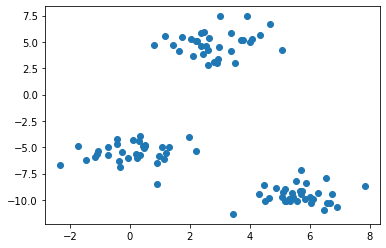

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
x, y = make_blobs(random_state=10)
plt.scatter(x[:,0], x[:, 1])

In [2]:
p1 = [5.683397508810986, 5.055340128019022]
p2 = [6.68000164584778, -5.1538014055317571]
p3 = [-1.3177517986543703, -4.979922671990228]

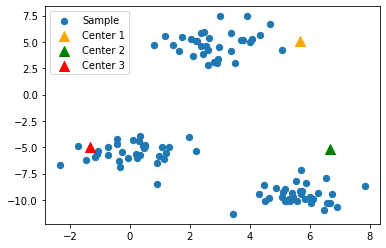

In [3]:
plt.scatter(x[:,0], x[:, 1], s=40, label='Sample')
plt.scatter(p1[0], p1[1], s=100, label='Center 1', c='orange', marker='^')
plt.scatter(p2[0], p2[1], s=100, label='Center 2', c='green', marker='^')
plt.scatter(p3[0], p3[1], s=100, label='Center 3', c='red', marker='^')
plt.legend()
plt.savefig('c1')

In [4]:
# 각점에서 중심점까지의 직선거리 계산
import numpy as np
import pandas as pd
dist = pd.DataFrame(x)
dist['c1'] = np.sqrt(np.power(x[:, 0] - p1[0], 2) + np.power(x[:, 1] - p1[1], 2))
dist['c2'] = np.sqrt(np.power(x[:, 0] - p2[0], 2) + np.power(x[:, 1] - p2[1], 2))
dist['c3'] = np.sqrt(np.power(x[:, 0] - p3[0], 2) + np.power(x[:, 1] - p3[1], 2))
dist

,0,1,c1,c2,c3
0,-2.324963,-6.699996,14.223986,9.136745,1.993271
1,0.518568,-4.900868,11.216129,6.166623,1.838021
2,2.443018,3.846526,3.458510,9.947760,9.594248
3,5.826623,-9.922593,14.978618,4.844547,8.687467
4,2.033002,5.289908,3.657924,11.430909,10.802638
...,...,...,...,...,...
95,-0.736931,-4.957402,11.894353,7.419533,0.581257
96,2.790440,3.068621,3.509452,9.095983,9.036387
97,4.486980,-10.074298,15.176870,5.387080,7.723184
98,6.268638,-9.381380,14.448578,4.247546,8.770754


In [5]:
# 가장 가까운 중심점 찾기
dist['round1'] = dist.loc[:, 'c1':'c3'].values.argmin(axis=1)
dist

,0,1,c1,c2,c3,round1
0,-2.324963,-6.699996,14.223986,9.136745,1.993271,2
1,0.518568,-4.900868,11.216129,6.166623,1.838021,2
2,2.443018,3.846526,3.458510,9.947760,9.594248,0
3,5.826623,-9.922593,14.978618,4.844547,8.687467,1
4,2.033002,5.289908,3.657924,11.430909,10.802638,0
...,...,...,...,...,...,...
95,-0.736931,-4.957402,11.894353,7.419533,0.581257,2
96,2.790440,3.068621,3.509452,9.095983,9.036387,0
97,4.486980,-10.074298,15.176870,5.387080,7.723184,1
98,6.268638,-9.381380,14.448578,4.247546,8.770754,1


0    2.840507
1    4.858404
dtype: float64
0    5.618347
1   -9.542885
dtype: float64
0    0.089212
1   -5.464417
dtype: float64


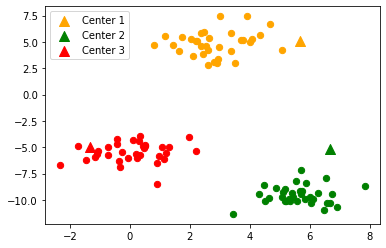

In [6]:
# 가장 가까운 중심점과 같은 색으로 칠하기
color = ['orange', 'green', 'red']
for cls in range(3):
    subset = dist.loc[dist['round1']==cls, [0, 1]]
    plt.scatter(subset.iloc[:, 0], subset.iloc[:, 1], s=40, c=color[cls])
    print(subset.mean())
plt.scatter(p1[0], p1[1], s=100, label='Center 1', c='orange', marker='^')
plt.scatter(p2[0], p2[1], s=100, label='Center 2', c='green', marker='^')
plt.scatter(p3[0], p3[1], s=100, label='Center 3', c='red', marker='^')
plt.legend()
plt.savefig('c2')

In [7]:
# 새로운 중심 좌표 설정

p1 = [2.840507, 4.858404]
p2 = [5.618347, -9.542885]
p3 = [0.089212,  -5.464417]

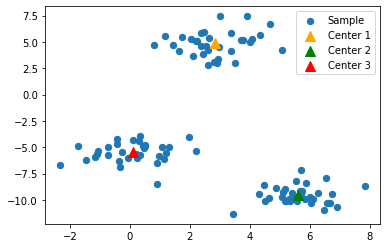

In [8]:
plt.scatter(x[:,0], x[:, 1], s=40, label='Sample')
plt.scatter(p1[0], p1[1], s=100, label='Center 1', c='orange', marker='^')
plt.scatter(p2[0], p2[1], s=100, label='Center 2', c='green', marker='^')
plt.scatter(p3[0], p3[1], s=100, label='Center 3', c='red', marker='^')
plt.legend()
plt.savefig('c1')

In [12]:
dist = pd.DataFrame(x)
dist['c1'] = np.sqrt(np.power(x[:, 0] - p1[0], 2) + np.power(x[:, 1] - p1[1], 2))
dist['c2'] = np.sqrt(np.power(x[:, 0] - p2[0], 2) + np.power(x[:, 1] - p2[1], 2))
dist['c3'] = np.sqrt(np.power(x[:, 0] - p3[0], 2) + np.power(x[:, 1] - p3[1], 2))

dist['round1'] = dist.loc[:, 'c1':'c3'].values.argmin(axis=1)
dist

,0,1,c1,c2,c3,round1
0,-2.324963,-6.699996,12.660122,8.436717,2.711991,2
1,0.518568,-4.900868,10.031689,6.896090,0.708473,2
2,2.443018,3.846526,1.087149,13.760780,9.603857,0
3,5.826623,-9.922593,15.079614,0.433079,7.265894,1
4,2.033002,5.289908,0.915565,15.259962,10.928579,0
...,...,...,...,...,...,...
95,-0.736931,-4.957402,10.447398,7.836850,0.969318,2
96,2.790440,3.068621,1.790483,12.924672,8.950384,0
97,4.486980,-10.074298,15.023198,1.249957,6.371135,1
98,6.268638,-9.381380,14.646622,0.670046,7.316276,1


0    2.840507
1    4.858404
dtype: float64
0    5.618347
1   -9.542885
dtype: float64
0    0.089212
1   -5.464417
dtype: float64


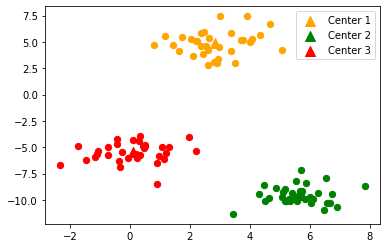

In [11]:
# 가장 가까운 중심점과 같은 색으로 칠하기
color = ['orange', 'green', 'red']
for cls in range(3):
    subset = dist.loc[dist['round1']==cls, [0, 1]]
    plt.scatter(subset.iloc[:, 0], subset.iloc[:, 1], s=40, c=color[cls])
    print(subset.mean())
plt.scatter(p1[0], p1[1], s=100, label='Center 1', c='orange', marker='^')
plt.scatter(p2[0], p2[1], s=100, label='Center 2', c='green', marker='^')
plt.scatter(p3[0], p3[1], s=100, label='Center 3', c='red', marker='^')
plt.legend()
plt.savefig('c2')

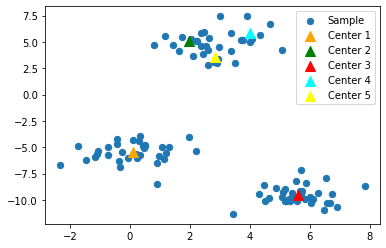

In [14]:
# KMeans를 이용한 그룹찾기

from sklearn.cluster import KMeans
color = ['orange', 'green', 'red', 'cyan','yellow']

K = KMeans(n_clusters=5).fit(x)
plt.scatter(x[:,0], x[:, 1], s=40, label='Sample')

centers = K.cluster_centers_

for idx, center in enumerate(centers):
    plt.scatter(center[0], center[1], s=100, 
                label=f'Center {idx+1}', c=color[idx], marker='^')
plt.legend()
plt.show()

### DBSCAN

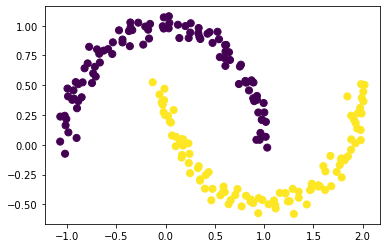

In [16]:
# DBSCAN 예제

from sklearn.datasets import make_moons
x, y = make_moons(200, noise=.05, random_state=0)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50)

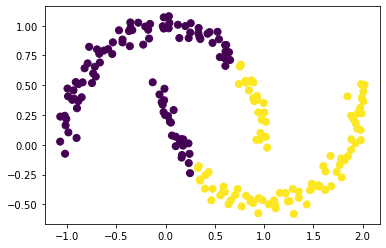

In [17]:
#KMeans로 분석

labels = KMeans(n_clusters=2, random_state=0).fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50)


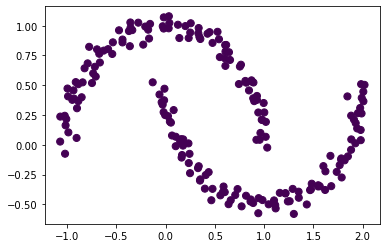

In [18]:
# DBSCAN으로 분석

from sklearn.cluster import DBSCAN
labels = DBSCAN().fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50)

In [19]:
	
# 표준화
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)
x_scaled.mean(axis=0), x_scaled.std(axis=0)

(array([ 1.37667655e-16, -1.32671651e-16]), array([1., 1.]))

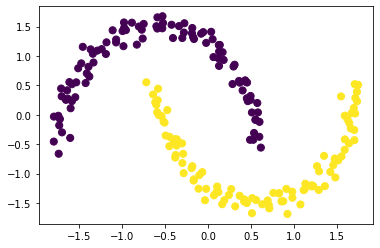

In [20]:

labels = DBSCAN().fit_predict(x_scaled)
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=labels, s=50)

In [21]:
# 군집평가

from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score

x, y = make_blobs(random_state=10)
labels = KMeans(n_clusters=3).fit_predict(x)

print('ACC: ', accuracy_score(y, labels))
print('ARI :', adjusted_rand_score(y, labels))
print('NMI :', normalized_mutual_info_score(y, labels))

ACC:  1.0
ARI : 1.0
NMI : 1.0


In [22]:
from sklearn.datasets import load_iris
iris = load_iris()

k_range = range(2, 15)
inertias = []

for k in k_range:
    model = KMeans(n_clusters=k).fit(iris['data'])
    inertias.append(model.inertia_)

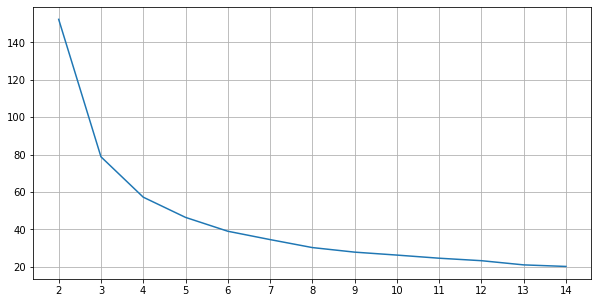

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertias)
plt.xticks(k_range)
plt.grid()

In [24]:
# 실루엣 계수 계산
from sklearn.metrics import silhouette_score

k_range = range(2, 15)
scores = []

for k in k_range:
    model = KMeans(n_clusters=k).fit(iris['data'])
    scores.append(silhouette_score(iris['data'], model.labels_))

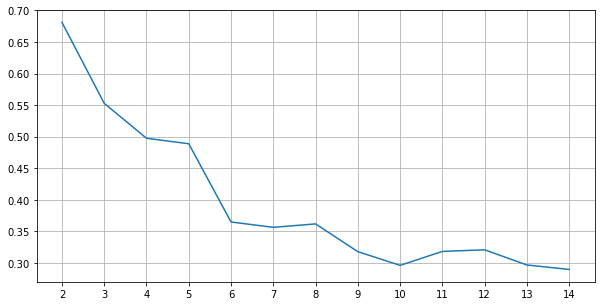

In [25]:
	
plt.figure(figsize=(10, 5))
plt.plot(k_range, scores)
plt.xticks(k_range)
plt.grid()